# water probability

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('water_potability.csv')

In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## EDA

In [4]:
df.shape

(3276, 10)

In [5]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [9]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
df['ph'] = df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate'] = df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [11]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## data visualization

In [12]:
cls=["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]


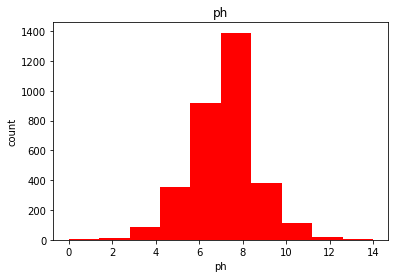

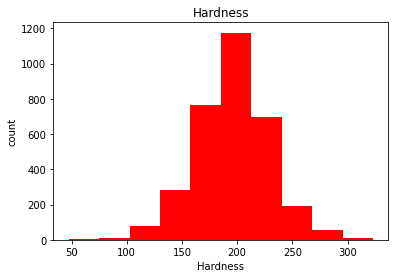

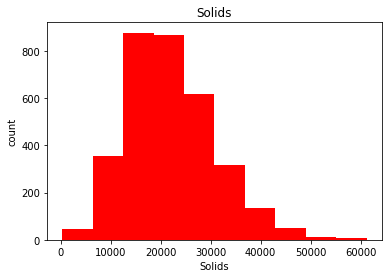

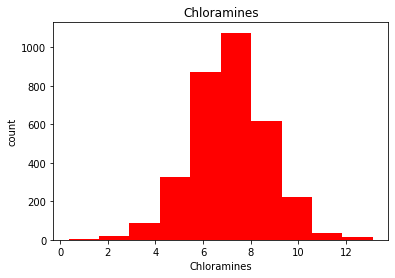

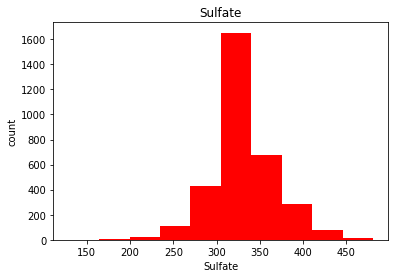

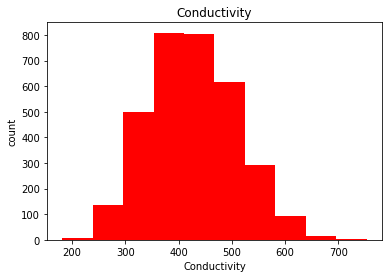

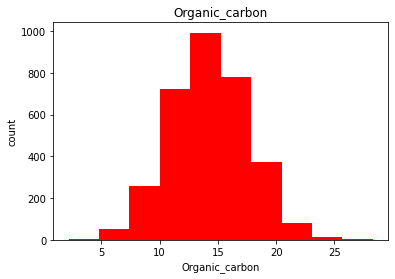

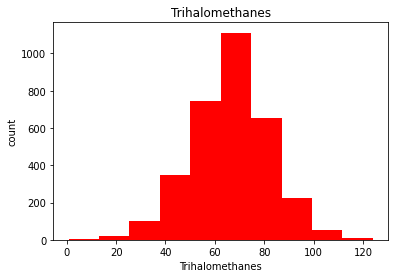

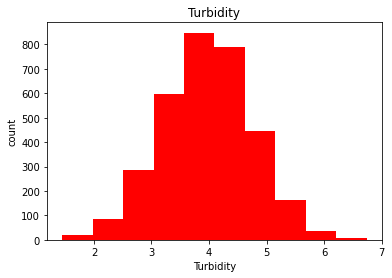

In [13]:
for i in cls:
    plt.hist(x=i,data=df,color='red')
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

<AxesSubplot:ylabel='Potability'>

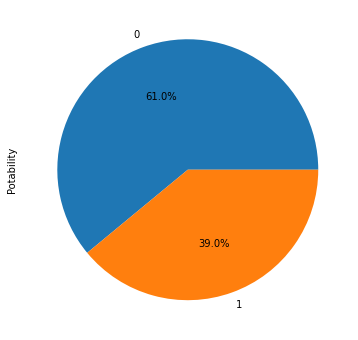

In [14]:
plt.figure(figsize=(9,6))
df['Potability'].value_counts().plot(kind='pie',autopct="%1.1f%%")

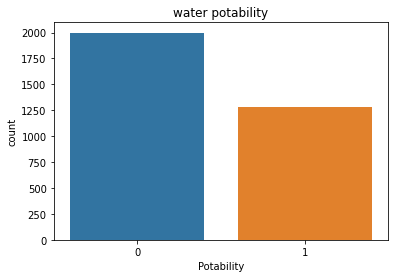

In [15]:
sns.countplot(df['Potability'])
plt.title('water potability')
plt.xlabel('Potability')
plt.ylabel('count')
plt.show()

<Figure size 2160x1440 with 0 Axes>

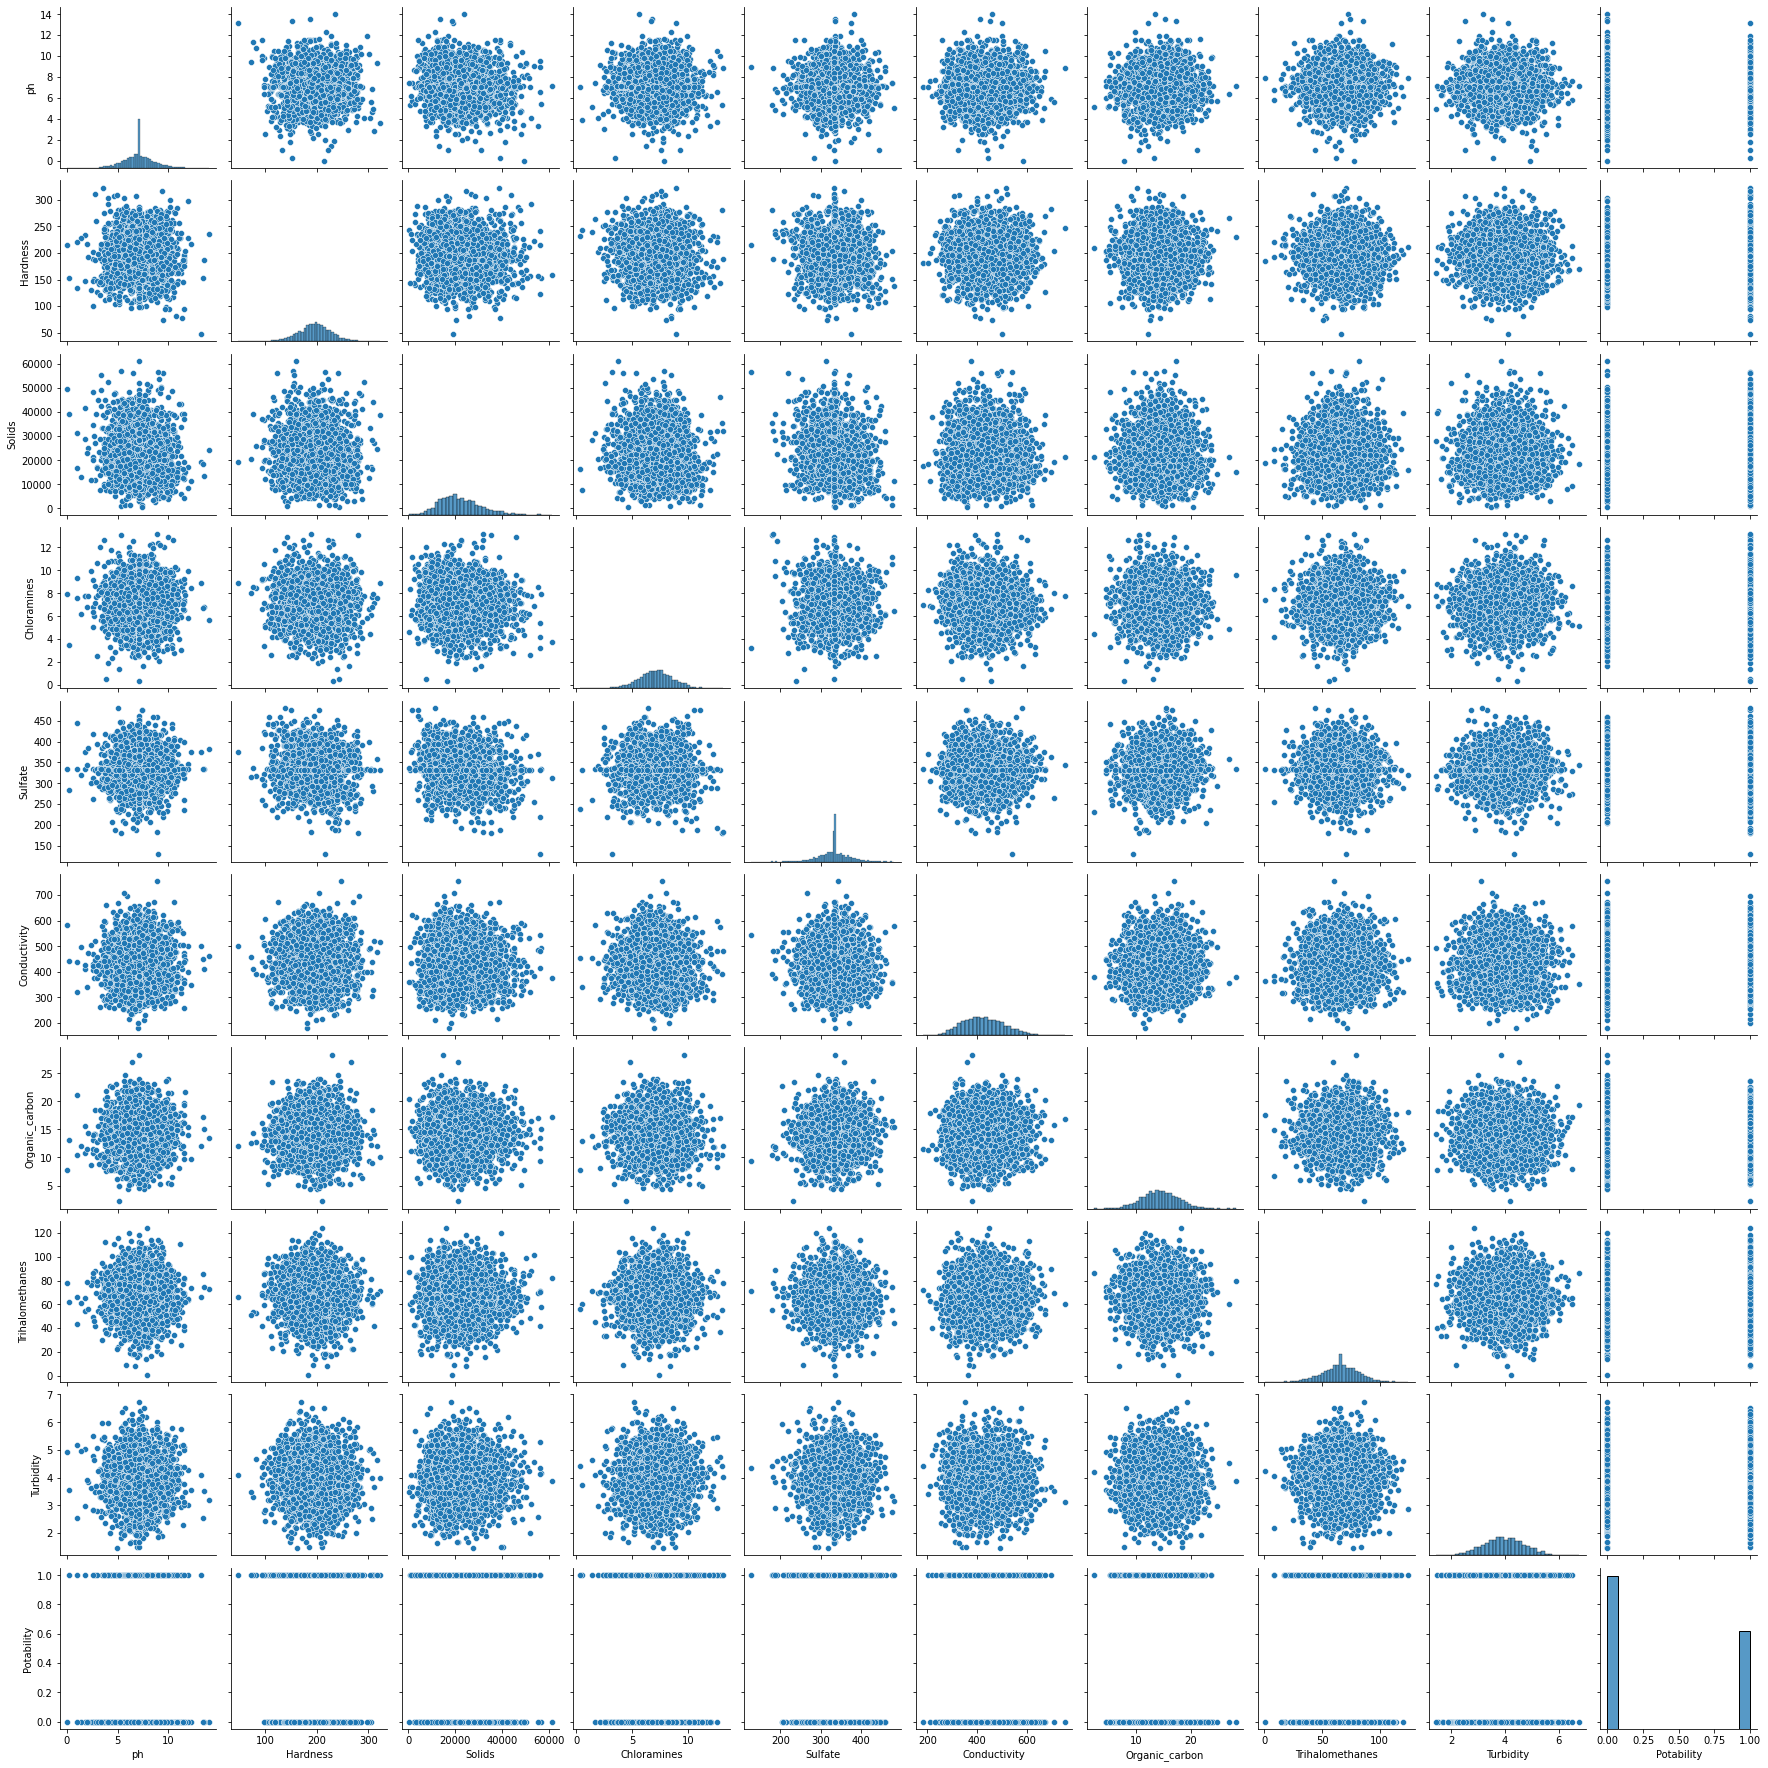

In [16]:
plt.figure(figsize=(30,20))
sns.pairplot(df)
plt.show()

In [17]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075878,-0.081887,-0.031827,0.014785,0.017205,0.040092,0.003009,-0.036211,-0.003848
Hardness,0.075878,1.000000,-0.046899,-0.030054,-0.092718,-0.023915,0.003610,-0.012718,-0.014449,-0.013837
Solids,-0.081887,-0.046899,1.000000,-0.070148,-0.149809,0.013831,0.010242,-0.008849,0.019546,0.033743
Chloramines,-0.031827,-0.030054,-0.070148,1.000000,0.023490,-0.020486,-0.012653,0.016615,0.002363,0.023779
Sulfate,0.014785,-0.092718,-0.149809,0.023490,1.000000,-0.014196,0.027403,-0.025797,-0.009523,-0.026957
Conductivity,0.017205,-0.023915,0.013831,-0.020486,-0.014196,1.000000,0.020966,0.001238,0.005798,-0.008128
Organic_carbon,0.040092,0.003610,0.010242,-0.012653,0.027403,0.020966,1.000000,-0.012944,-0.027308,-0.030001
Trihalomethanes,0.003009,-0.012718,-0.008849,0.016615,-0.025797,0.001238,-0.012944,1.000000,-0.021540,0.007305
Turbidity,-0.036211,-0.014449,0.019546,0.002363,-0.009523,0.005798,-0.027308,-0.021540,1.000000,0.001581
Potability,-0.003848,-0.013837,0.033743,0.023779,-0.026957,-0.008128,-0.030001,0.007305,0.001581,1.000000


<AxesSubplot:>

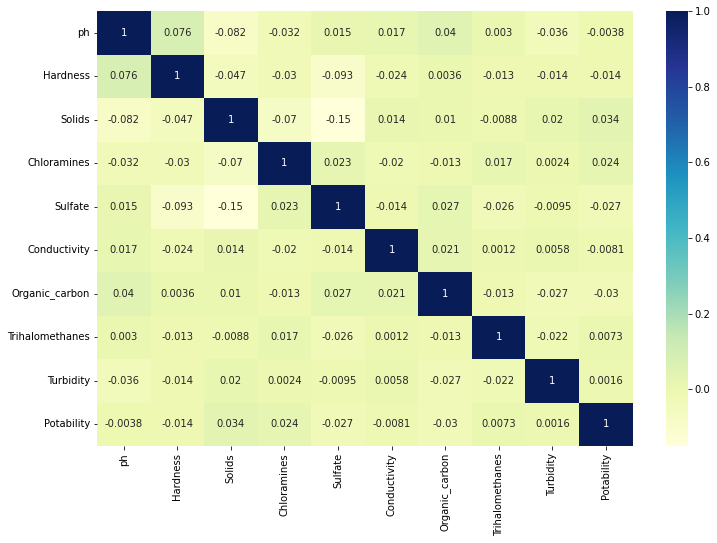

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

In [19]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### outlier detection

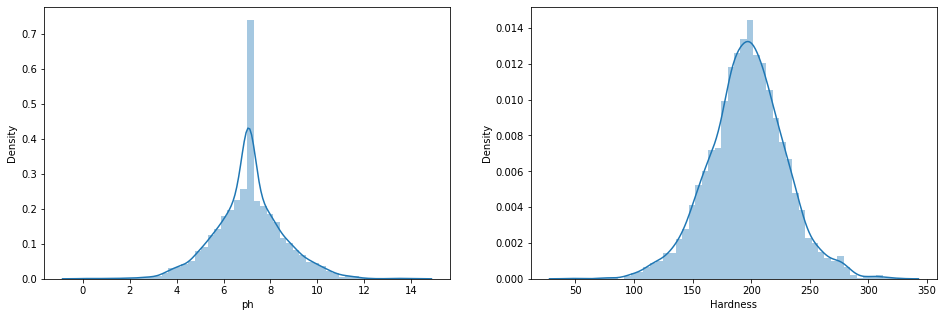

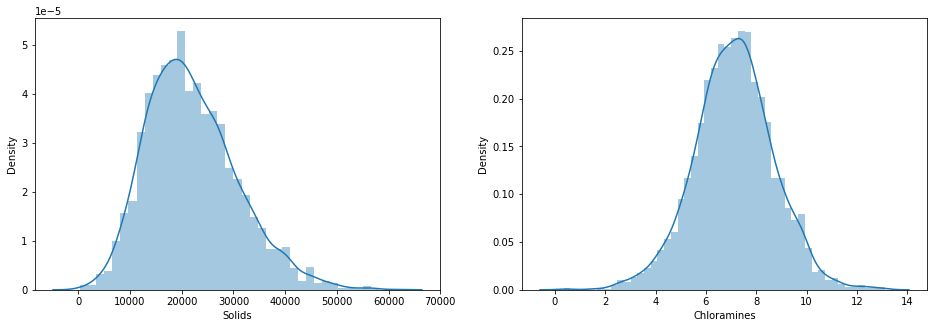

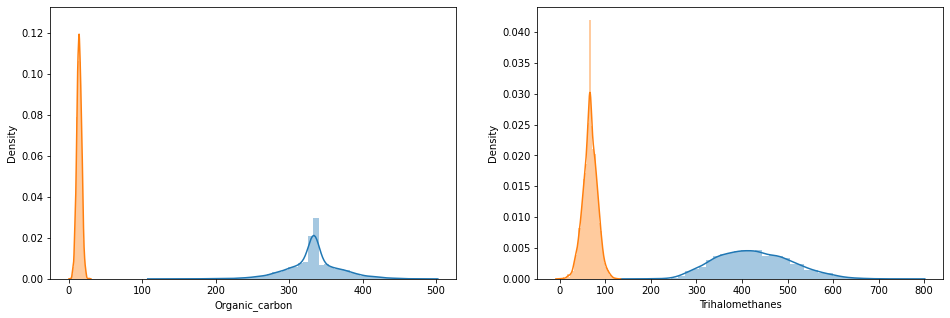

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['ph'])
plt.subplot(1,2,2)
sns.distplot(df['Hardness'])
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Solids'])
plt.subplot(1,2,2)
sns.distplot(df['Chloramines'])
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Sulfate'])
plt.subplot(1,2,2)
sns.distplot(df['Conductivity'])
plt.subplot(1,2,1)
sns.distplot(df['Organic_carbon'])
plt.subplot(1,2,2)
sns.distplot(df['Trihalomethanes'])
plt.show()


<AxesSubplot:xlabel='Conductivity', ylabel='Density'>

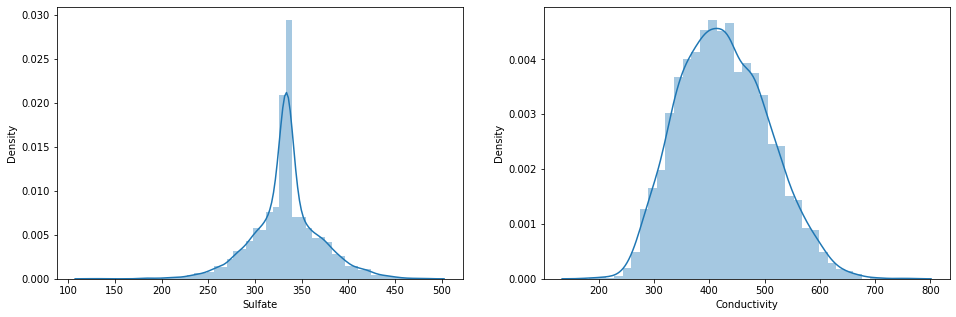

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Sulfate'])
plt.subplot(1,2,2)
sns.distplot(df['Conductivity'])

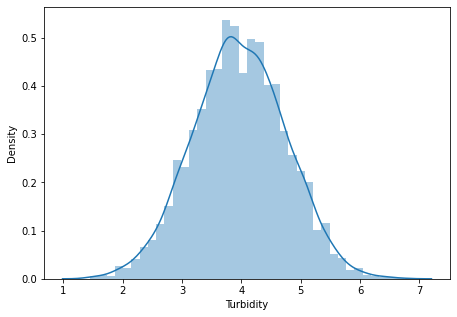

In [22]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Turbidity'])
plt.show()


<AxesSubplot:>

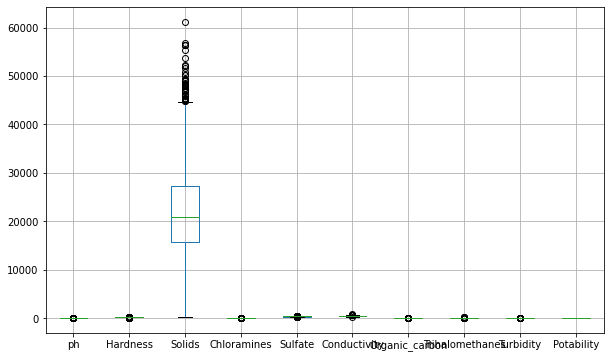

In [23]:
df.boxplot(figsize=(10,6))

In [24]:
# here it contain many outlier but we can't remove the outlier becuaseif we remove the outlier then every time the water will be pure.that means it will say the water is safe or not to drink 

In [25]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## model building

In [26]:
x=df.drop(['Potability'],axis=1)
y=df['Potability']

In [27]:
x.shape,y.shape

((3276, 9), (3276,))

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaled=StandardScaler()
x=scaled.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [31]:
x_train.shape,y_train.shape

((2620, 9), (2620,))

In [32]:
x_test.shape,y_test.shape

((656, 9), (656,))

## model training

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

### model testing

In [34]:
yp_test=lr.predict(x_test)
yp_train=lr.predict(x_train)

### model evaluation

In [35]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,auc,accuracy_score

In [36]:
print(classification_report(yp_train,y_train))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76      2620
           1       0.00      0.00      0.00         0

    accuracy                           0.61      2620
   macro avg       0.50      0.31      0.38      2620
weighted avg       1.00      0.61      0.76      2620



In [37]:
print(classification_report(yp_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75       656
           1       0.00      0.00      0.00         0

    accuracy                           0.60       656
   macro avg       0.50      0.30      0.38       656
weighted avg       1.00      0.60      0.75       656



In [38]:
cm=confusion_matrix(yp_test,y_test)
cm

array([[395, 261],
       [  0,   0]], dtype=int64)

<AxesSubplot:>

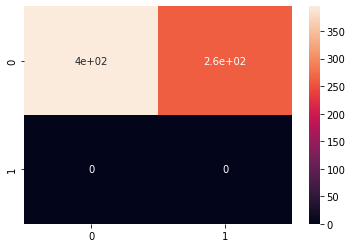

In [39]:
sns.heatmap(cm,annot=True)

In [40]:
accuracy_score(yp_test,y_test)

0.6021341463414634

In [41]:
accuracy_score(yp_train,y_train)

0.6118320610687022

In [42]:
# here the first model i got only very low accuracy so i need to do another model to improve my accuracy

In [43]:
#decisiontree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [45]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
yp_test1=dt_model.predict(x_test)

In [47]:
print(classification_report(y_test,yp_test1))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       395
           1       0.67      0.62      0.65       261

    accuracy                           0.73       656
   macro avg       0.72      0.71      0.71       656
weighted avg       0.72      0.73      0.73       656



In [48]:
accuracy_score(y_test,yp_test1)

0.7271341463414634

In [49]:
cm=confusion_matrix(y_test,yp_test1)
cm

array([[314,  81],
       [ 98, 163]], dtype=int64)

<AxesSubplot:>

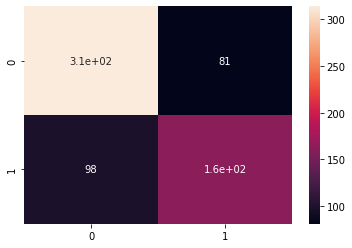

In [50]:
sns.heatmap(cm,annot=True)

In [51]:
#using gridsearch cv

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid_model=GridSearchCV(estimator = dt_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[1,2,3,4,5,6,7,8],
                                                        'min_samples_split':[2,3,4,5,6,7,8,10],
                                                        'min_samples_leaf':[1,2,3,4,5,6]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.7797709923664122


In [54]:
dt_model_cv=DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 2,criterion='entropy',min_samples_split = 10,class_weight={0:2,1:1})
dt_model_cv.fit(x_train,y_train)
y_pred=dt_model_cv.predict(x_test)
accuracy_score(y_test,y_pred)

0.7515243902439024

In [55]:
# looking which model is best for it

In [56]:
models = pd.DataFrame(columns=['models' , 'Accuracy score'])

In [57]:
model_list = [("Random Forest", RandomForestClassifier(random_state=42)),
              ("LightGBM", LGBMClassifier(random_state=42)),
              ("Support Vector Machines", SVC(random_state=42)),
              ("XGBoost", XGBClassifier(random_state=42)),
              ("Gaussian Naive Bayes", GaussianNB()),
              ("Bernoulli Naive Bayes", BernoulliNB()),
              ("KNN", KNeighborsClassifier(n_neighbors=2)),
              ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42))]


In [58]:
for name,clf in model_list:
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    score = accuracy_score(y_test,predictions)
    
    new_row = {'model': name, 'accuracy score':score}
    models = models.append(new_row, ignore_index=True)

[14:19:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#It can be seen that the one which is yielding the most accurate result without Hyperparameter Tuning is Random Forest.

In [59]:
models.sort_values(by='Accuracy score',ascending=False)

,models,Accuracy score,accuracy score,model
0,NaN,NaN,0.769817,Random Forest
1,NaN,NaN,0.780488,LightGBM
2,NaN,NaN,0.676829,Support Vector Machines
3,NaN,NaN,0.771341,XGBoost
4,NaN,NaN,0.588415,Gaussian Naive Bayes
5,NaN,NaN,0.617378,Bernoulli Naive Bayes
6,NaN,NaN,0.621951,KNN
7,NaN,NaN,0.765244,Bagging Classifier


In [60]:
def visualize_roc_auc_curve(model, model_name):
    pred_prob = model.predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
    
    score = roc_auc_score(y_test, pred_prob[:, 1])
    
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, linestyle="--", color="orange", label="ROC AUC Score: (%0.5f)" % score)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    
    plt.title(f"{model_name} ROC Curve", size=15)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", prop={"size": 15})
    plt.show()

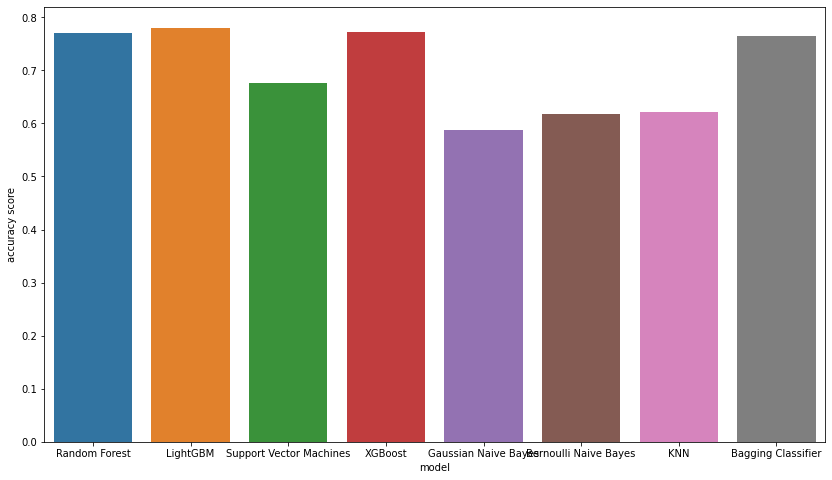

In [61]:
plt.figure(figsize=(14, 8))
sns.barplot(x=models["model"], y=models["accuracy score"])
plt.show()

In [62]:
# here i got high accuracy in some models and i use three models from it.

### confusion matrix and classification report of random forest

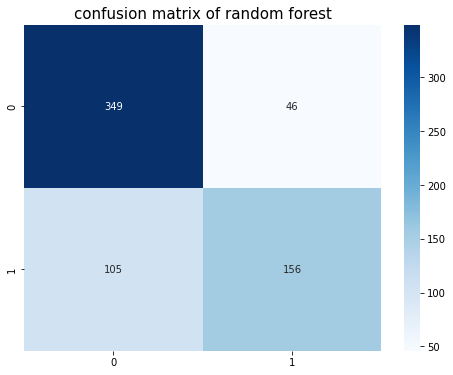

In [63]:
rfc = RandomForestClassifier(random_state=12)
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap="Blues",fmt="d")
plt.title("confusion matrix of random forest",size=15)
plt.show()

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       395
           1       0.77      0.60      0.67       261

    accuracy                           0.77       656
   macro avg       0.77      0.74      0.75       656
weighted avg       0.77      0.77      0.76       656



## confusion matrix and classification report of lightGBM

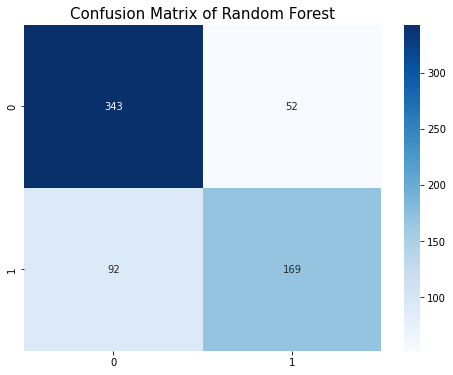

In [65]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x_train, y_train)
predictions = lgbm.predict(x_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Random Forest", size=15)
plt.show()

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       395
           1       0.76      0.65      0.70       261

    accuracy                           0.78       656
   macro avg       0.78      0.76      0.76       656
weighted avg       0.78      0.78      0.78       656



## confusion matrix and classification report of bagging classifier

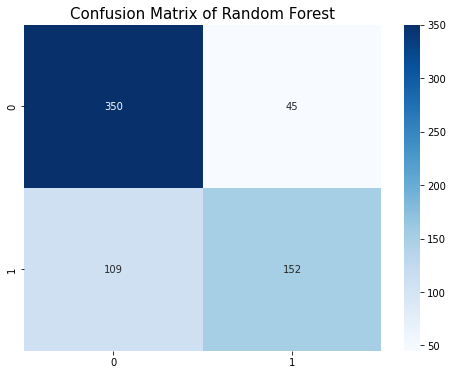

In [67]:
bag = BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)
bag.fit(x_train, y_train)
predictions = bag.predict(x_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Random Forest", size=15)
plt.show()

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       395
           1       0.77      0.58      0.66       261

    accuracy                           0.77       656
   macro avg       0.77      0.73      0.74       656
weighted avg       0.77      0.77      0.76       656



## tuning the lightGBM

In [69]:
param_grid_lgbm = param_grid = {'learning_rate': [0.01, 0.05, 0.1],
                                'n_estimators': [10, 50, 100, 150, 200],
                                'num_leaves': [6, 10, 16, 20, 31, 40],
                                'objective' : ['binary'],
                                "random_state": [42]}
grid_lgbm= GridSearchCV(LGBMClassifier(),param_grid_lgbm,scoring="accuracy",cv=5,verbose=0,n_jobs=-1)
grid_lgbm.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [10, 50, 100, 150, 200],
                         'num_leaves': [6, 10, 16, 20, 31, 40],
                         'objective': ['binary'], 'random_state': [42]},
             scoring='accuracy')

In [70]:
lgbm_params = grid_lgbm.best_params_
lgbm = LGBMClassifier(**lgbm_params)
lgbm.fit(x_train, y_train)
predictions = lgbm.predict(x_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "LightGBM", "Accuracy Score": score}


Accuracy Score: 0.7820121951219512


In [71]:
# here lightgbm is more accuracy in here and also we can use random forest and bagging classifier

In [72]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,